In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True) 
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

https://www.kaggle.com/datasets/ashydv/housing-dataset

In [169]:
df = pd.read_csv("Housing.csv")

# EDA

The dependent column is the price

In [170]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [172]:
#from ydata_profiling import ProfileReport

#ProfileReport(df)

In [173]:
nan_count = df.isna().sum()
print(nan_count)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


## Dummies

In [174]:
df=pd.get_dummies(df)

In [175]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False


In [176]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


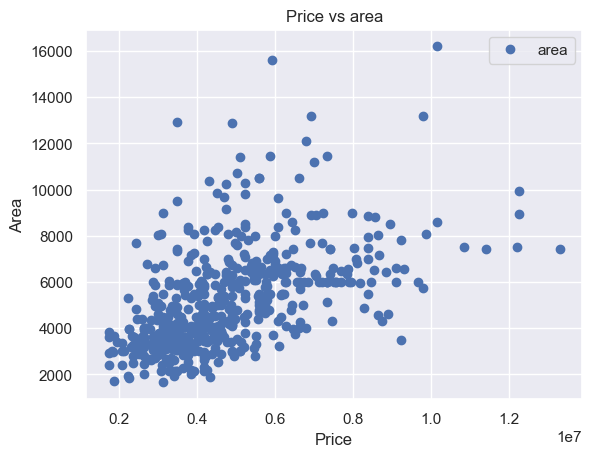

In [177]:
df.plot(x="price", y="area", style='o')
plt.title("Price vs area")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

# Identifying Outliers in area and price

<Axes: xlabel='price'>

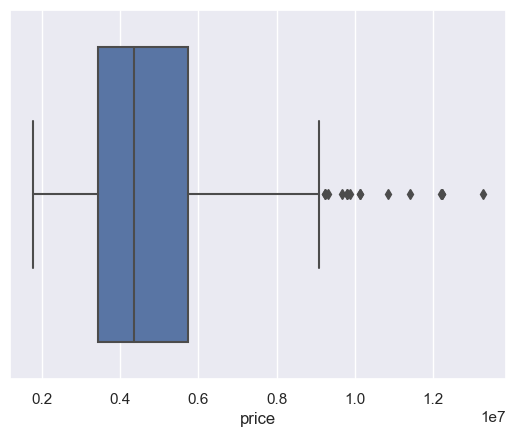

In [178]:
sns.boxplot(x=df["price"])


<Axes: xlabel='area'>

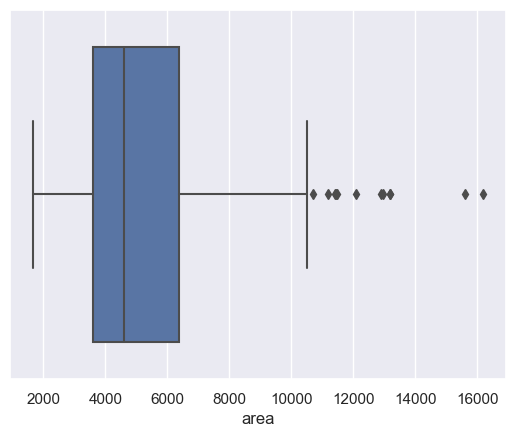

In [179]:
sns.boxplot(x=df["area"])

# Removing outliers

### Price

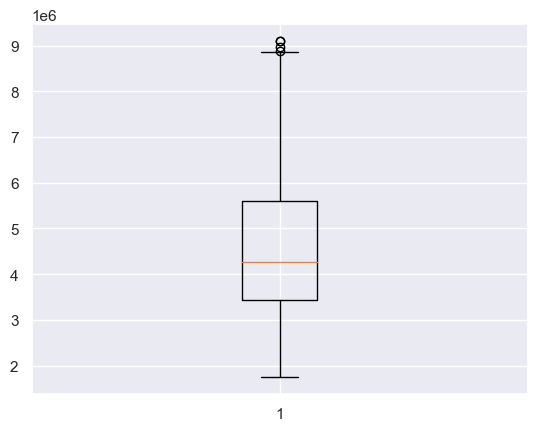

In [180]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]
plt.boxplot(df.price)
plt.show()


### Area

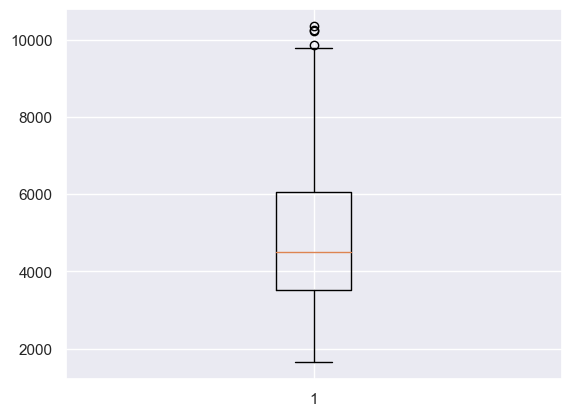

In [181]:
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3-Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)
plt.show()

<Axes: xlabel='price'>

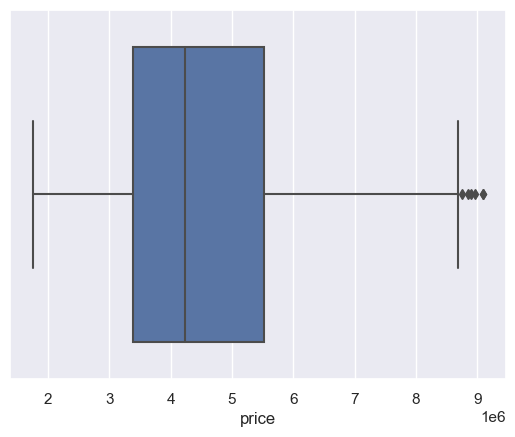

In [182]:
sns.boxplot(x=df["price"])

<Axes: xlabel='area'>

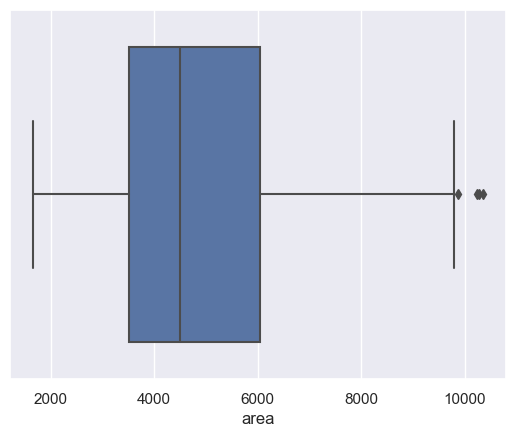

In [183]:
sns.boxplot(x=df["area"])

In [184]:
df.shape

(517, 21)

In [185]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.170000e+02,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.568873e+06,4890.108317,2.941973,1.261122,1.794971,0.653772
std,1.594826e+06,1779.173101,0.731701,0.465368,0.865205,0.843380
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.395000e+06,3520.000000,2.000000,1.000000,1.000000,0.000000
50%,4.235000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.530000e+06,6050.000000,3.000000,1.000000,2.000000,1.000000
max,9.100000e+06,10360.000000,6.000000,3.000000,4.000000,3.000000


After to remove the price and area outliers, the number of observations decreased from 545 to 517

# Price vs area without plots

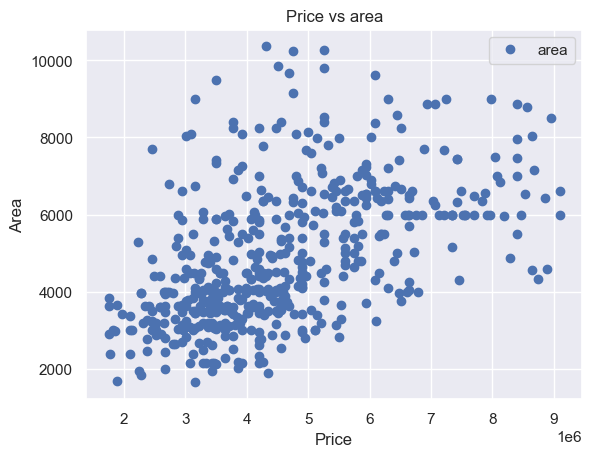

In [186]:
df.plot(x="price", y="area", style='o')
plt.title("Price vs area")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()


<Axes: xlabel='price', ylabel='Density'>

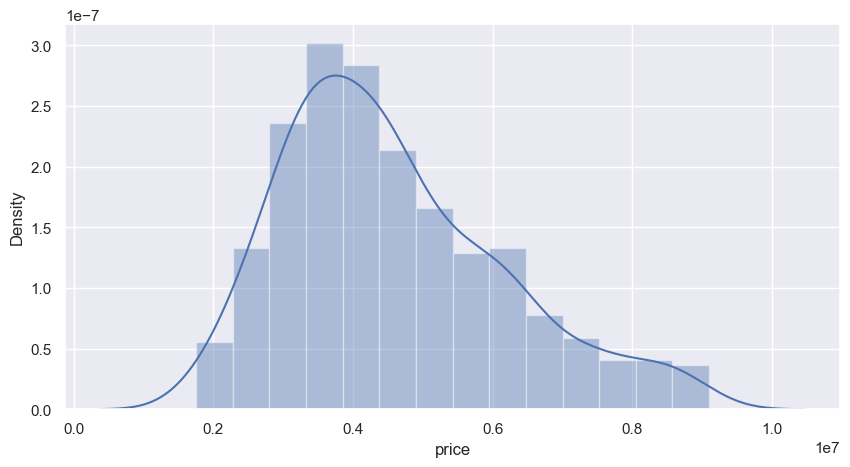

In [187]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(df['price'])

<Axes: xlabel='area', ylabel='Density'>

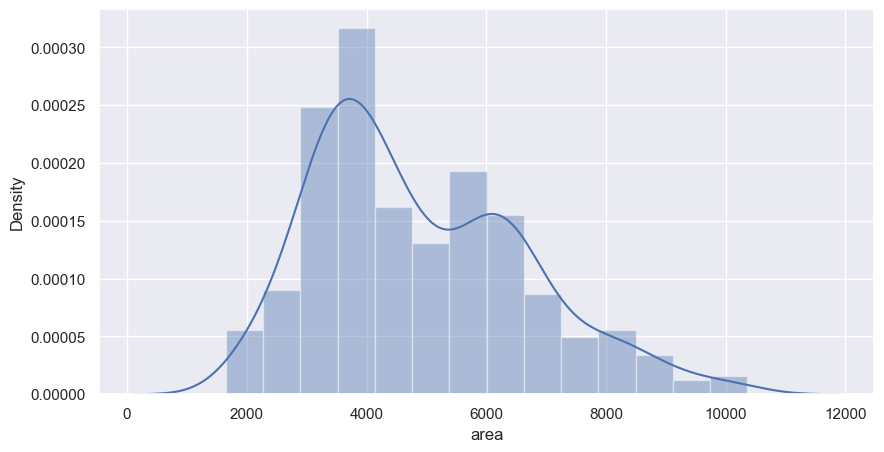

In [188]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(df['area'])

In [189]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,False,True,True,False,...,True,True,False,True,False,True,False,False,True,False
16,9100000,6600,4,2,2,1,False,True,False,True,...,True,True,False,False,True,False,True,False,False,True
17,8960000,8500,3,2,4,2,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
18,8890000,4600,3,2,2,2,False,True,False,True,...,False,True,False,False,True,True,False,True,False,False
19,8855000,6420,3,2,2,1,False,True,True,False,...,False,True,False,False,True,False,True,False,True,False


# Heatmap/ Correlation matrix

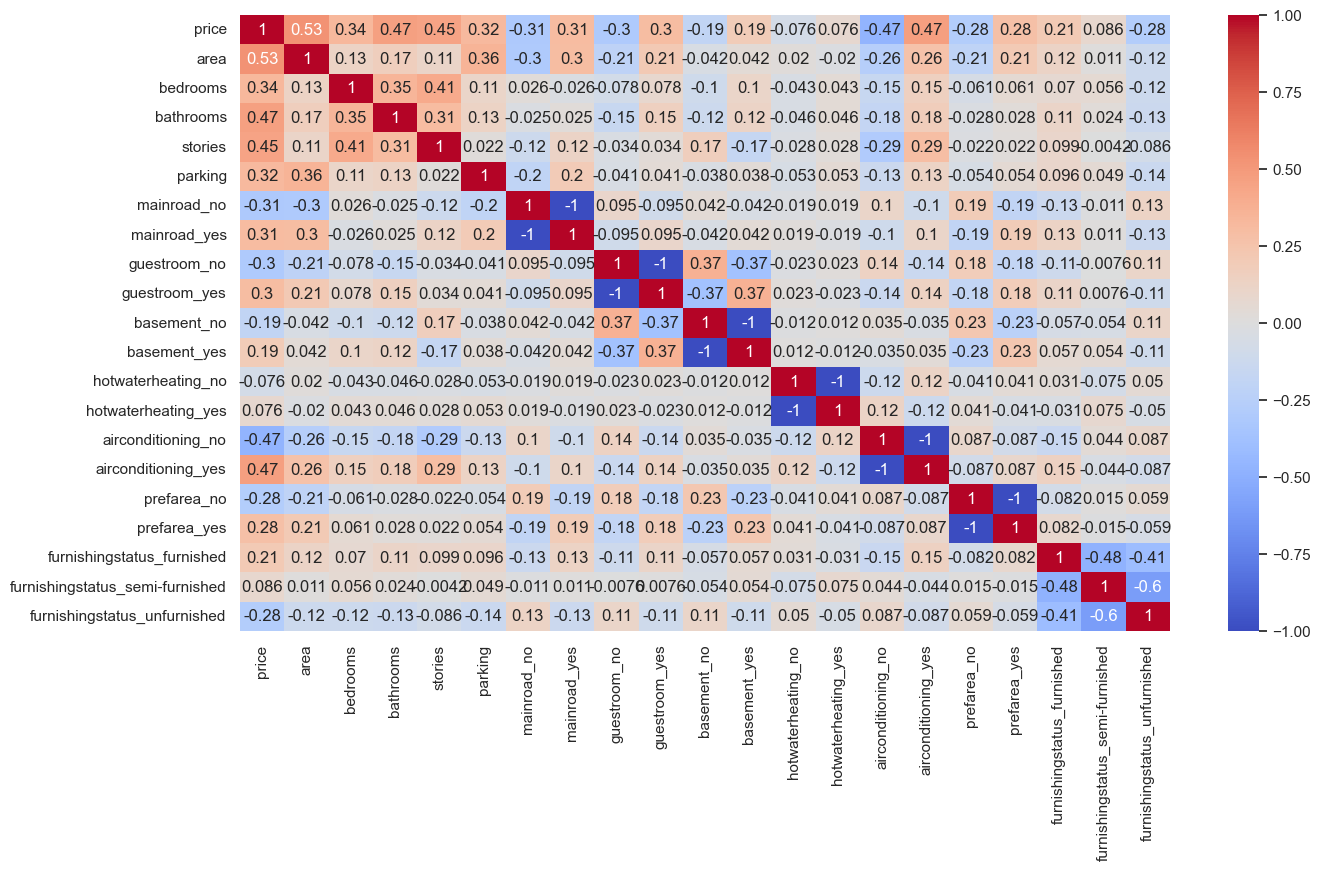

In [190]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

# Defining values

In [191]:
X = df.drop("price", axis=1)
y = df["price"]

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data

In [193]:
from sklearn.preprocessing import RobustScaler
sc =  RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [194]:
def displayRegressionMetrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("Root Mean Squared Error:", mse**.5)
    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print('R2 Score:', r2)

# Random Forest Regressor

In [195]:
rf_model = RandomForestRegressor(n_estimators=300, max_features="sqrt", max_depth=5, random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

print("Metrics for the Training Data:")

print("\n")
print("Metrics for the Validation/Test Data:")


Metrics for the Training Data:


Metrics for the Validation/Test Data:


In [196]:
feature_importances = rf_model.feature_importances_
# Sort the features starting with the most important ones
feature_indices = feature_importances.argsort()[::-1]
feature_threshold = 7
top_feature_indices = feature_indices[:feature_threshold]


In [197]:
def plotFeatureImportance(feat_imp, dataframe):
    # Access the most important features
    feature_imp = pd.Series(feat_imp,index=dataframe.columns).sort_values(ascending=False)    
    plt.figure(figsize=(20,12))
    # Creating a bar plot
    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    #plt.legend()
    plt.show()

# Feature importance

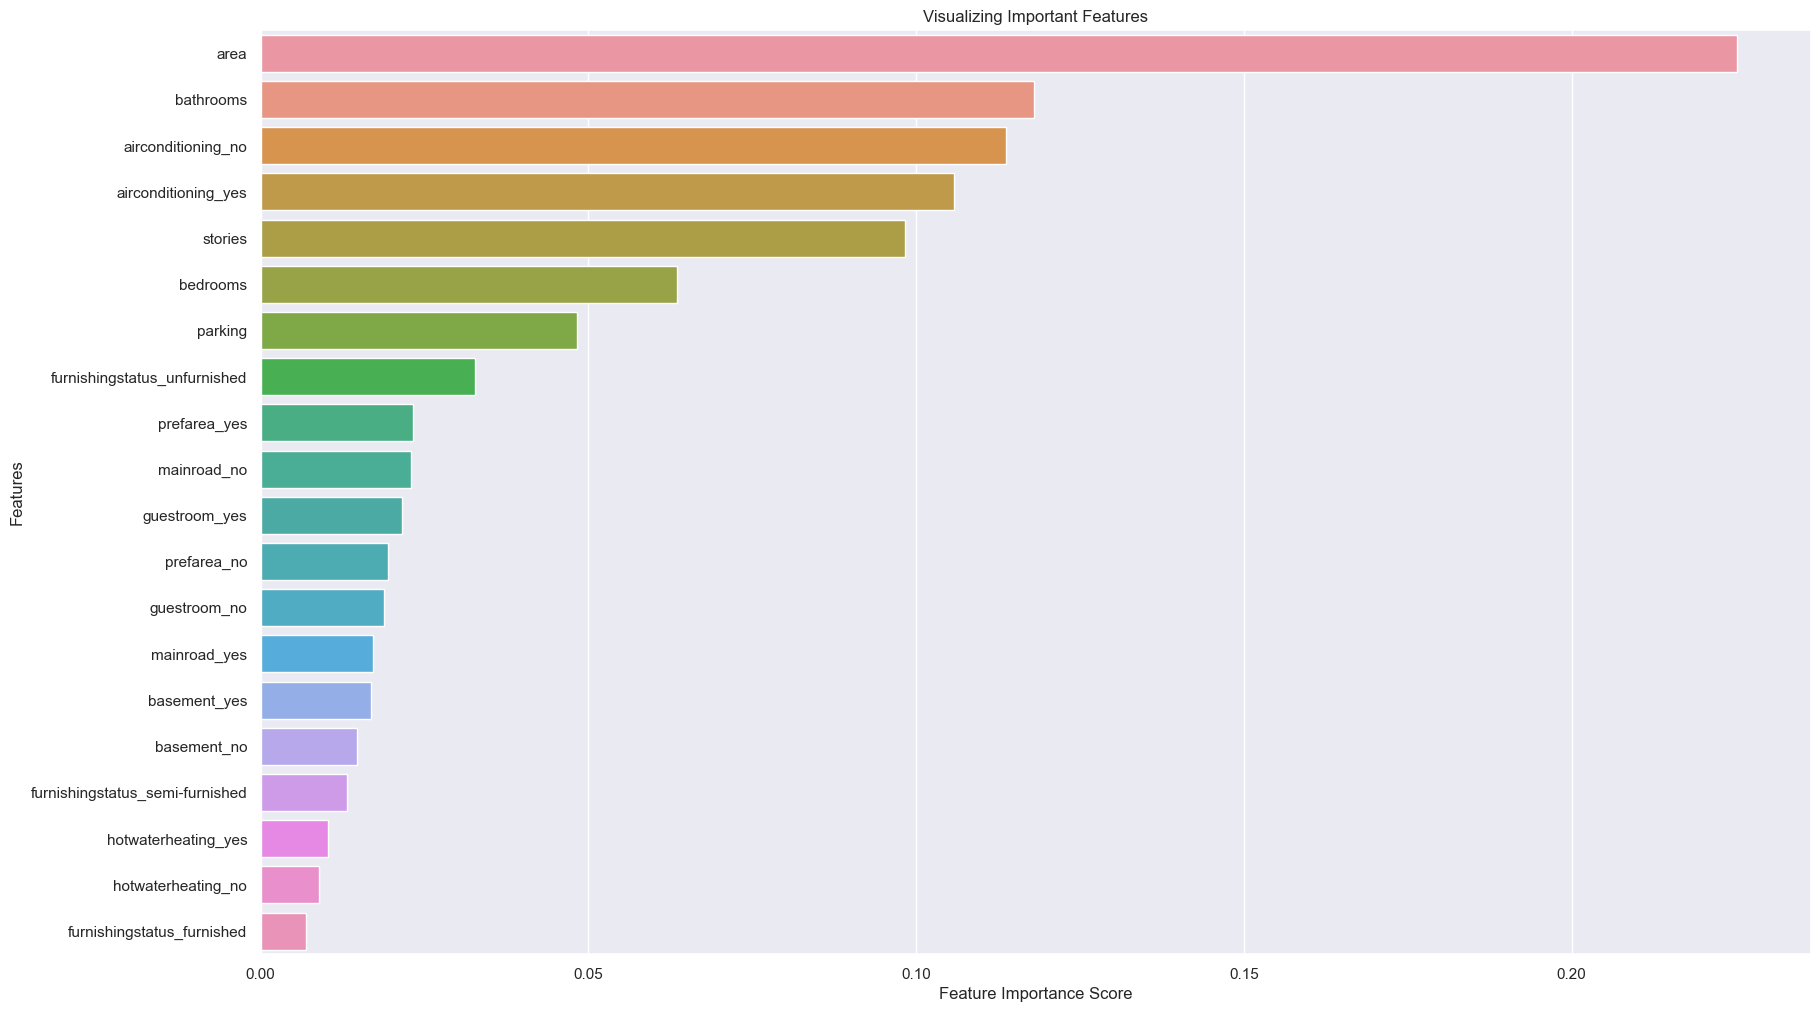

In [198]:
plotFeatureImportance(feature_importances,X)

In [199]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [200]:
X_train_top = X_train[:, top_feature_indices]
X_test_top = X_test[:, top_feature_indices]
rf_model_top = RandomForestRegressor(n_estimators=300, max_features="sqrt", max_depth=5, random_state=42)
rf_model_top.fit(X_train_top, y_train)
y_pred = rf_model_top.predict(X_test_top)
y_train_pred = rf_model_top.predict(X_train_top)

print("Metrics for the Training Data:")
displayRegressionMetrics(y_train, y_train_pred)

print("\n")
print("Metrics for the Validation/Test Data:")
displayRegressionMetrics(y_test, y_pred)

Metrics for the Training Data:
Root Mean Squared Error: 875092.1006175377
Mean Squared Error: 765786184563.2148
Mean Absolute Error: 669045.960512752
R2 Score: 0.6852494027974141


Metrics for the Validation/Test Data:
Root Mean Squared Error: 1115575.5459032697
Mean Squared Error: 1244508798617.3782
Mean Absolute Error: 858708.6905927488
R2 Score: 0.5758058704101031


# Hypertuning RFR

In [217]:
start = time.time()
grid = { 
    'regressor__n_estimators': [200,300,400,300,500,600,700],
    'regressor__max_features': ['sqrt','log2'],
    'regressor__max_depth' : list(range(3,10)),
    'regressor__random_state' : [42, 35, 54, 60]
}
## Use GridSearchCV with no feature importance
pipeline = Pipeline([
    ('feature_selection', SelectKBest(k=feature_threshold)),
    ('regressor', RandomForestRegressor())
])
CV_rfr_top = GridSearchCV(pipeline, param_grid=grid, cv=5)
CV_rfr_top.fit(X_train, y_train)
end = time.time()
print("Code Execution Time: ", end - start)

Code Execution Time:  921.9745810031891


In [218]:
best_params = CV_rfr_top.best_params_
best_model = CV_rfr_top.best_estimator_
best_score = CV_rfr_top.best_score_

best_model.fit(X_train, y_train)
best_params, best_score

({'regressor__max_depth': 7,
  'regressor__max_features': 'sqrt',
  'regressor__n_estimators': 700,
  'regressor__random_state': 35},
 0.5020357559587334)

In [219]:
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

print("Metrics for the Training Data:")
displayRegressionMetrics(y_train, y_train_pred)
print("\n")
print("Metrics for the Validation/Test Data:")
displayRegressionMetrics(y_test, y_pred)

Metrics for the Training Data:
Root Mean Squared Error: 782916.8605685706
Mean Squared Error: 612958810562.5465
Mean Absolute Error: 587810.7977563943
R2 Score: 0.7480639432073456


Metrics for the Validation/Test Data:
Root Mean Squared Error: 1117785.1184731757
Mean Squared Error: 1249443571080.0913
Mean Absolute Error: 830921.4109291171
R2 Score: 0.5741238401087743


# Support Vector Regression

In [220]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

REvise the structure of the data before the SV model
- Construct a new method that complies with the way SVR reads data

In [221]:
y_pred = svr_model.predict(X_test)
y_train_pred = svr_model.predict(X_train)

print("Metrics for the Training Data:")
displayRegressionMetrics(y_train, y_train_pred)
print("\n")
print("Metrics for the Validation/Test Data:")
displayRegressionMetrics(y_test, y_pred)

Metrics for the Training Data:
Root Mean Squared Error: 1595161.7721792364
Mean Squared Error: 2544541079422.0024
Mean Absolute Error: 1220289.4651731749
R2 Score: -0.04584783650987201


Metrics for the Validation/Test Data:
Root Mean Squared Error: 1786308.3604958546
Mean Squared Error: 3190897558777.388
Mean Absolute Error: 1364448.527797258
R2 Score: -0.08762590835828266


In [235]:
y_test.shape, y_pred.shape

((104,), (104,))

In [243]:
y_test[0:1]

331    3920000
Name: price, dtype: int64

In [244]:
 y_pred[0:1]

array([4245162.4082464])

# Hypertuning SVR

In [224]:
start = time.time()
param_grid = {
    'C': [0.1, 1, 10, 0.01, 0.001, 100],
    'epsilon': [0.01, 0.1, 1, 0.001, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}
CV_svr = GridSearchCV(SVR(), param_grid, cv=5)
CV_svr.fit(X_train, y_train)
end = time.time()
print("Code Execution Time: ", end - start)

Code Execution Time:  4.3627769947052


In [225]:
best_params_svr = CV_svr.best_params_
best_model_svr = CV_svr.best_estimator_
best_score_svr = CV_svr.best_score_
best_params_svr, best_score_svr

({'C': 100, 'epsilon': 100, 'kernel': 'linear'}, -0.027684019452731957)

In [226]:
y_pred = best_model_svr.predict(X_test)
y_train_pred = best_model_svr.predict(X_train)

print("Metrics for the Training Data:")
displayRegressionMetrics(y_train, y_train_pred)
print("\n")
print("Metrics for the Validation/Test Data:")
displayRegressionMetrics(y_test, y_pred)

Metrics for the Training Data:
Root Mean Squared Error: 1572206.3523008702
Mean Squared Error: 2471832814215.208
Mean Absolute Error: 1202643.7066471092
R2 Score: -0.01596355502671165


Metrics for the Validation/Test Data:
Root Mean Squared Error: 1759741.7637003087
Mean Squared Error: 3096691074911.073
Mean Absolute Error: 1342051.63095193
R2 Score: -0.055515378107477975


# Graph

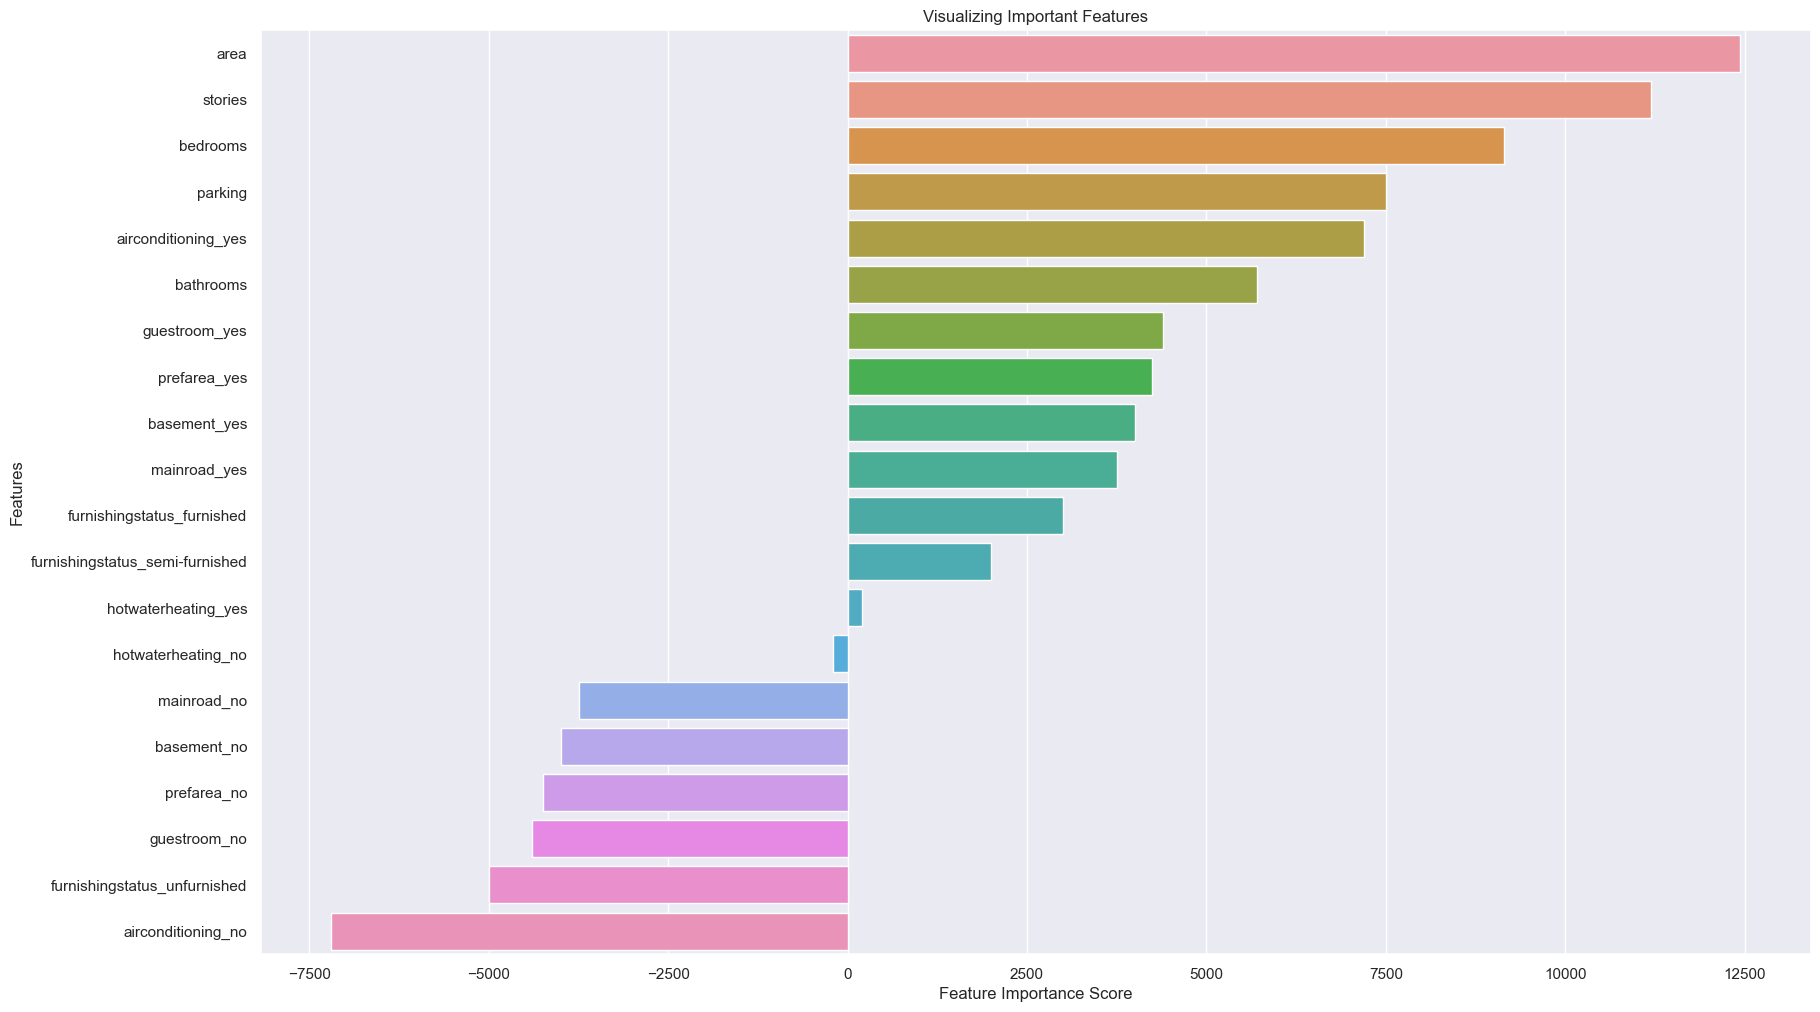

In [227]:
plotFeatureImportance(best_model_svr.coef_.ravel(), X)

In [229]:
start = time.time()
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('svr_model', SVR())
])
param_grid = {
    'feature_selection__k': [5, 8, 15],
    'svr_model__kernel': ['linear', 'rbf', 'poly'],
    'svr_model__C': [0.1, 1, 10, 0.01, 0.001, 100], 
    'svr_model__epsilon': [0.01, 0.1, 1, 0.001, 10, 100]
}
CV_svr_top = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
CV_svr_top.fit(X_train, y_train)
end = time.time()
print("Code Execution Time: ", end - start)

Code Execution Time:  18.76073169708252


In [230]:
best_params_svr_top = CV_svr_top.best_params_
best_model_svr_top = CV_svr_top.best_estimator_
best_score_svr_top = CV_svr_top.best_score_
best_params_svr_top, best_score_svr_top

({'feature_selection__k': 15,
  'svr_model__C': 100,
  'svr_model__epsilon': 0.001,
  'svr_model__kernel': 'linear'},
 -0.02831766884132105)

# Cross Validation on the models created

In [ ]:
plotSVRFeatureImportance(best_model_svr.coef_.ravel(), X)

In [ ]:
models = [
    {"model": rf_model, "name": "Base RFR"}, 
    {"model": best_model, "name": "Hypertuned RFR"}, 
    {"model": rf_model_top, "name": "Base Top Features RFR"}, 
    {"model": best_model_top, "name": "Hypertuned Top Features RFR"}]

# Loop through the models and perform cross-validation
for model in models:
    scores = cross_val_score(model["model"], X, y, cv=10, scoring='r2')
    print("Model: ", model["name"])
    print("R2 Scores: ", scores)
    print("Mean R2 Score: ", scores.mean())
    print("Standard Deviation of R2 Scores: ", scores.std())
    print("\n")